/var/folders/vq/67rg32y9779bptdgz21w4ql80000gn/T/ipykernel_34587/1959351141.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  auto = auto.resample('M').mean()
/var/folders/vq/67rg32y9779bptdgz21w4ql80000gn/T/ipykernel_34587/1959351141.py:9: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  auto['Auto_YoY'] = auto['Total_Sales'].pct_change(12)


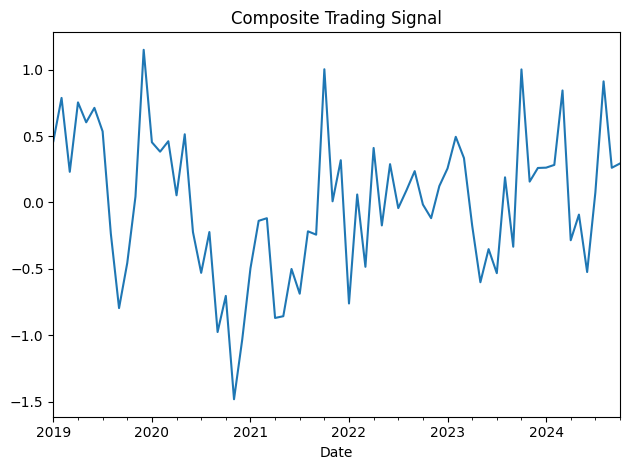

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load auto sales
auto = pd.read_csv('../data/simulated_auto_sales.csv', parse_dates=['Date'])
auto.set_index('Date', inplace=True)
auto = auto.resample('M').mean()
auto['Auto_YoY'] = auto['Total_Sales'].pct_change(12)

# Simulate momentum signal (e.g., rolling 3M return)
np.random.seed(0)
momentum = pd.DataFrame(index=auto.index)
momentum['Returns'] = np.random.normal(loc=0.01, scale=0.05, size=len(momentum))
momentum['Momentum_3M'] = momentum['Returns'].rolling(3).mean()

# Simulate Repo rate
repo = pd.DataFrame(index=auto.index)
repo['Repo'] = 6.0 + np.random.normal(0, 0.1, len(repo))
repo['Repo_Change3M'] = repo['Repo'].diff(3)

# Merge signals
signals = pd.concat([auto['Auto_YoY'], momentum['Momentum_3M'], repo['Repo_Change3M']], axis=1)
signals.columns = ['Auto_YoY', 'Momentum_3M', 'Repo_Change3M']
signals.dropna(inplace=True)

# Normalize and combine
signals_normalized = (signals - signals.mean()) / signals.std()
signals['Composite_Signal'] = signals_normalized.mean(axis=1)

# Save
signals.to_csv('../outputs/signal_dataset.csv')

# Plot
signals['Composite_Signal'].plot(title='Composite Trading Signal')
plt.tight_layout()
plt.savefig('../outputs/composite_signal.png')
plt.show()

